# PIKA: Prior Informatics Knowledge Assessment
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Prior Informatics Knowledge Assessment is a tool for assessing students’ programming knowledge and skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2025, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2025 here: https://pika-test.org/

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [2]:
!python clean_data.py
!python grade_submissions.py

Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
1 submissions.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 78
Submissions graded.


### Dataset

In [3]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
#df = df[(df['uni_course'] == 'no')]

# Convert all years to integers
#df['graduate_year'] = pd.to_numeric(df['graduate_year'], errors='coerce')

In [4]:
# Filter by Graduate Year
df = df.dropna(subset=['graduate_year'])
df['graduate_year'] = pd.to_numeric(df['graduate_year'], errors='coerce')
# Choose years
years = [2023, 2024, 2025]
#df = df[df['graduate_year'].isin(years)]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [5]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1 student submissions.


In [6]:
def plot_distribution(df, column_name, title="Distribution"):
    """
    Plots a bar chart showing the percentage frequency of individual courses
    from a column with comma-separated values.

    Parameters:
        df (pd.DataFrame): The input DataFrame
        column_name (str): Name of the column to process
        title (str): Title for the bar chart
    """
    # Replace '-' or empty strings with NaN
    course_series = df[column_name].replace('-', pd.NA).dropna()

    # Split comma-separated values and flatten the list
    course_series = course_series.str.lower().str.split(',').explode()

    # Strip whitespace
    course_series = course_series.str.strip()

    # Count frequencies
    course_counts = course_series.value_counts()

    # Calculate percentages (fraction form)
    total = course_counts.sum()
    course_percentages = (course_counts / total)

    # Plot
    ax = course_percentages.plot(kind='bar')
    plt.ylabel('Percentage of Students')
    plt.title(title)
    plt.xticks(rotation=45)

    # Format y-axis as percentages with no decimals
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

    plt.tight_layout()
    plt.show()


### Institutions

institution
UT    1
Name: count, dtype: int64


<Axes: ylabel='count'>

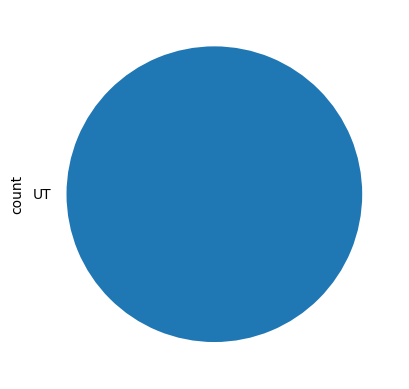

In [7]:
institution_column = "institution"

print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

graduate_year
2023    1
Name: count, dtype: int64


<Axes: >

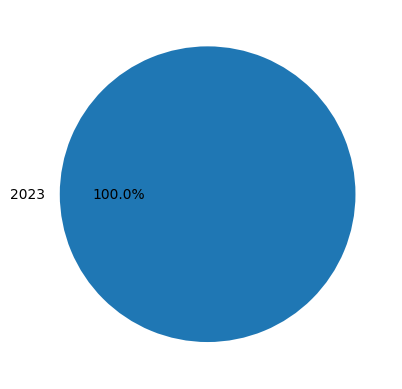

In [8]:
graduateyear_column = "graduate_year"

print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')

# Educational Background
What experiences with programming do these students have? 

## STEM Courses

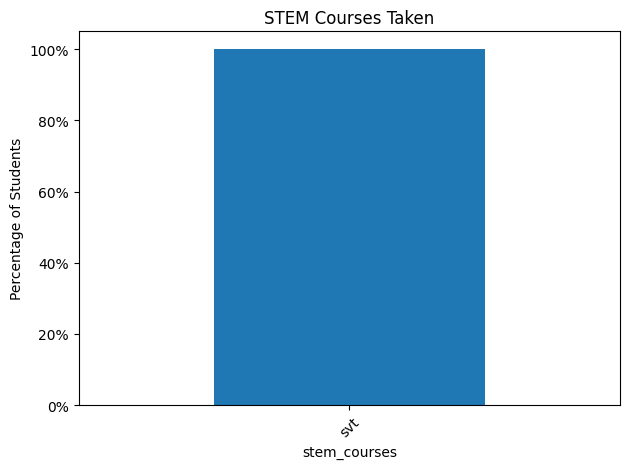

In [9]:
plot_distribution(df, 'stem_courses', title='STEM Courses Taken')

## Elective Programming Courses

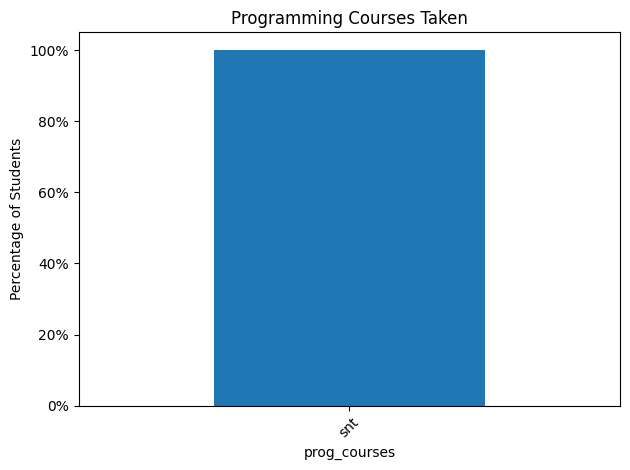

In [10]:
plot_distribution(df, 'prog_courses', title='Programming Courses Taken')

## Math Courses

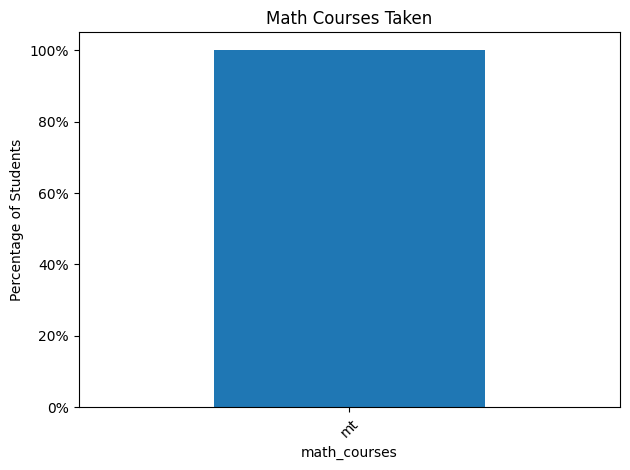

In [11]:
plot_distribution(df, 'math_courses', title='Math Courses Taken')

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report such experience.

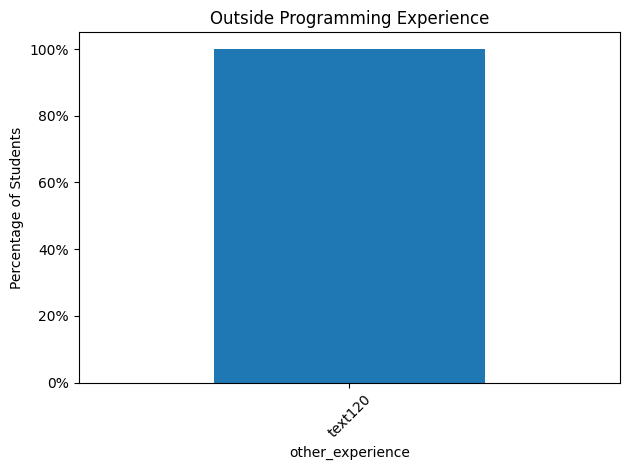

In [12]:
plot_distribution(df, 'other_experience', title='Outside Programming Experience')

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [13]:
# Configurations
bins = 20
max_points = 78 # i.e. range
edgecolor = 'black'
alpha = 0.5

## Main Result
A histogram of the total score of the students. The maximum score has been converted to a scale from 0 to 100, from the original 78 point max.

Mean: 10.0
Median: 10.0
Standard deviation: nan


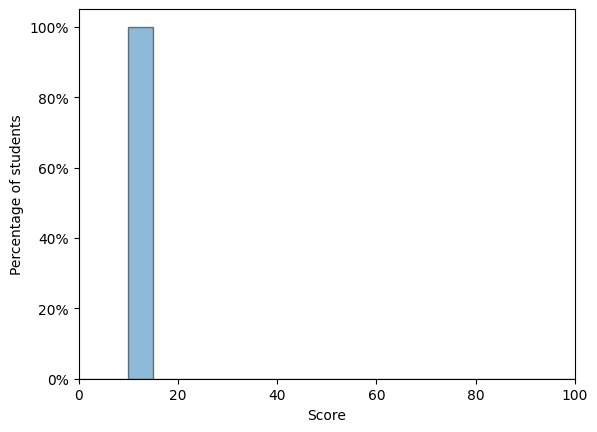

In [14]:
x = df['Total']

# Convert scores to percentages relative to the max_points
x_percent = (x / max_points) * 100
x_label = 'Percentage of Maximum Score'

# Calculate mean and standard deviation
mean = df['Total'].mean()
median = df['Total'].median()
sd = df['Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Median: {round(median, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

# Plot the histogram
plt.hist(x_percent, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, 
         weights=np.ones(len(x)) / len(x), range=[0, 100])

# Set '%' formatter for both x and y axes
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100, symbol=''))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add x and y axis labels
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Percentage of students')  # Label for the y-axis

# Adjust margins and display the plot
plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()

# Save the figure
fig.savefig('plots/allHist_percentage.png', dpi=300, bbox_inches='tight')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

In [15]:
def plot_likert_distribution(df, column_name, title="Likert Scale Distribution"):
    """
    Maps numeric Likert scale values to their text descriptors and plots a bar chart showing percentages.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column with numeric Likert values.
        title (str): Title for the plot.
    """
    # Mapping from keys to descriptors
    likert_map = {
        -2: "Very easy",
        -1: "Easy",
         0: "Neutral",
         1: "Difficult",
         2: "Very difficult"
    }

    # Convert column to numeric if needed
    data = pd.to_numeric(df[column_name], errors='coerce')

    # Map numeric values to text
    labels = data.map(likert_map)

    # Define desired order
    label_order = ["Very easy", "Easy", "Neutral", "Difficult", "Very difficult"]

    # Count and calculate percentages
    counts = labels.value_counts(normalize=True).reindex(label_order, fill_value=0)

    plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100, symbol=''))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    # Plot
    counts.plot(kind='bar', color='cornflowerblue')
    plt.ylabel("Percentage of students")
    plt.title(title)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

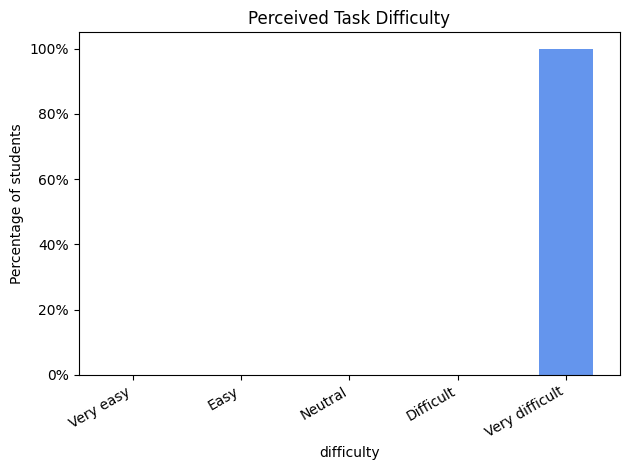

In [16]:
plot_likert_distribution(df, 'difficulty', title='Perceived Task Difficulty')

# Prior Programming Experience in Secondary School

In [17]:
# Significance test
def significane(group1, group2):
    # Perform Mann-Whitney U Test
    stat, p_value = stats.ranksums(group1, group2)
    
    # Print the test statistic and p-value
    print(f"Wilcox Rank-sum test: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation of p-value
    a = 0.05
    if p_value < a:
        print("Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

In [18]:
# Pseudo median --- Better average for non-normal distributions
def hodgesLehmannEstimator(x):
    x = x.to_numpy()
    n = len(x)
    hl = np.zeros(n*(n + 1)//2)
    idx = 0
    for i in range(n):
        for j in range(i+1):
            hl[idx] = (x[i] + x[j])/2
            idx += 1
    return np.median(hl)

def compare_distributions(x, y, x_label, y_label, save_figure_name=''):
    n = len(x)
    average = hodgesLehmannEstimator(x)
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Average score of {x_label}: {round(average, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = hodgesLehmannEstimator(y)
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Average score of {y_label}: {round(average, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, max_points])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, max_points])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

    # Add x and y axis labels
    plt.xlabel('Score')  # Label for the x-axis
    #plt.ylabel('Percentage of students')  # Label for the y-axis
    
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    if save_figure_name != '':
        fig.savefig('plots/'+save_figure_name+'.png', dpi=300, bbox_inches='tight')

## Graduation Year

In [19]:
# The yaer in which students entered university with programming experience form secondary school
initial_reformed_university_class_year = 2023

N students in 2023 and later: 1
Average score of 2023 and later: 10.0
Standard deviation of 2023 and later: nan

N students in Before 2023: 0
Average score of Before 2023: 10.0
Standard deviation of Before 2023: nan


C:\Users\fuf007\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fuf007\AppData\Roaming\Python\Python312\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


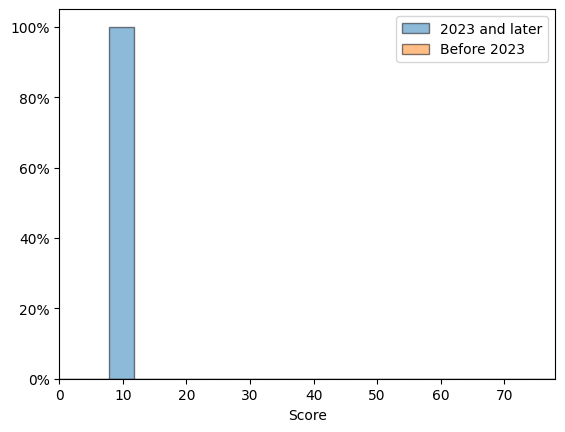

C:\Users\fuf007\AppData\Local\Temp\ipykernel_10096\1756254441.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = stats.ranksums(group1, group2)


Wilcox Rank-sum test: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference between the two groups.


In [20]:
years = df['graduate_year']

# Select groups based on year
x = df[years >= initial_reformed_university_class_year]['Total'].dropna()
y = df[years < initial_reformed_university_class_year]['Total'].dropna()

x_label = f'{initial_reformed_university_class_year} and later'
y_label = f'Before {initial_reformed_university_class_year}'

compare_distributions(x, y, x_label, y_label, 'graduateYearHist')
significane(x, y)

### Mathematics Courses

N students in 2P: 0
Average score of 2P: nan
Standard deviation of 2P: nan

N students in R2: 0
Average score of R2: nan
Standard deviation of R2: nan


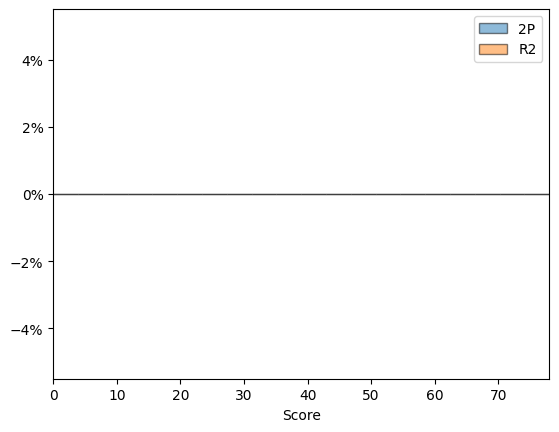

Wilcox Rank-sum test: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference between the two groups.


C:\Users\fuf007\AppData\Local\Temp\ipykernel_10096\1756254441.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = stats.ranksums(group1, group2)


In [21]:
# Select rows where 'math_courses' contains '2P'
x = df[df['math_courses'].str.contains(r'\b2P\b', na=False)]['Total'].dropna()

# Select rows where 'math_courses' contains 'R2'
y = df[df['math_courses'].str.contains(r'\bR2\b', na=False)]['Total'].dropna()

x_label = '2P'
y_label = 'R2'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Programming Electives

N students in IT2: 0
Average score of IT2: nan
Standard deviation of IT2: nan

N students in NoElective: 0
Average score of NoElective: nan
Standard deviation of NoElective: nan


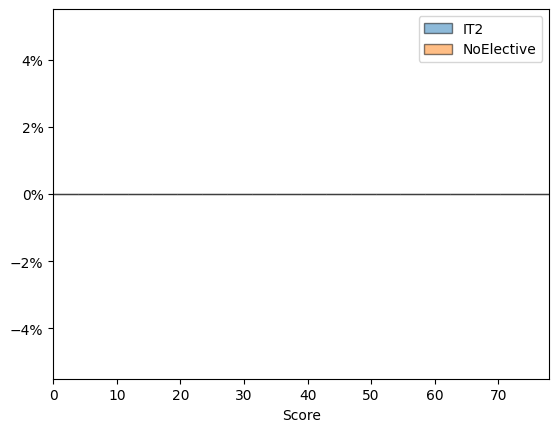

Wilcox Rank-sum test: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference between the two groups.


C:\Users\fuf007\AppData\Local\Temp\ipykernel_10096\1756254441.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = stats.ranksums(group1, group2)


In [22]:
elective = 'it2'
x = df[df['prog_courses'].str.contains(elective, na=False)]['Total'].dropna()

# No electives
y = df[df['prog_courses'] == 'none']['Total'].dropna()

x_label = 'IT2'
y_label = 'NoElective'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Outside Experience

N students in At least 30h text/block: 1
Average score of At least 30h text/block: 10.0
Standard deviation of At least 30h text/block: nan

N students in No electives: 0
Average score of No electives: 10.0
Standard deviation of No electives: nan


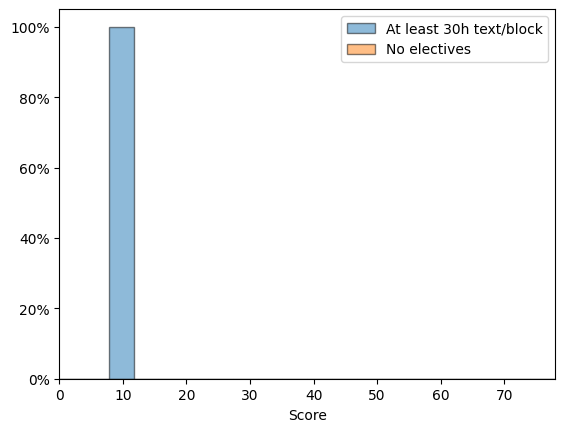

Wilcox Rank-sum test: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference between the two groups.


C:\Users\fuf007\AppData\Local\Temp\ipykernel_10096\1756254441.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = stats.ranksums(group1, group2)


In [23]:
# At least 30h in block based or text based programming outside of school
x = df[df['prog_courses'] != 'none']['Total'].dropna()

# No outside experience
y = df[df['prog_courses'] == 'none']['Total'].dropna()

x_label = 'At least 30h text/block'
y_label = 'No electives'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

## Sub Group Performance

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [24]:
def correctnes_rate(columns, topic, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{topic:15s} {correct_answer_rate*100:3.2f} %')

In [25]:
# Expressions
expression_tasks = []
for i in range(1, 7):
    expression_tasks.append(f'expressions{i}')

# Variables
variable_tasks = []
for i in range(1, 6):
    variable_tasks.append(f'variables{i}a')
    variable_tasks.append(f'variables{i}b')
    if i > 3:
        variable_tasks.append(f'variables{i}c')
        
# Booleans
alphabet = 'abcdefg'
boolean_tasks = []
for i in range(1, 6):
    for j, letter in enumerate(alphabet):
        boolean_tasks.append(f'bool{i}{letter}')
        if i == 1 and j == 3:
            break
        if i == 3 and j == 3:
            break
        if i == 4 and j == 4:
            break
        if i == 5 and j == 4:
            break
boolean_tasks.append('bool6')

# Lists
list_tasks = []
for i in range(1, 7):
    if i < 5:
        list_tasks.append(f'lists{i}')
    else:
        list_tasks.append(f'lists{i}a')
        list_tasks.append(f'lists{i}b')


# Conditionals
conditional_tasks = []
for i in range(1, 6):
    conditional_tasks.append(f'conditionals{i}')

# Loops
loop_tasks = []
for i in range(1, 12):
    loop_tasks.append(f'loops{i}')

# Functions
function_tasks = []
for i in range(1, 6):
    function_tasks.append(f'functions{i}')
function_tasks.append('functions6a')
function_tasks.append('functions6b')
function_tasks.append('functions7a')
function_tasks.append('functions7b')
function_tasks.append('functions7c')

all_tasks = expression_tasks + variable_tasks + boolean_tasks + list_tasks + conditional_tasks + loop_tasks + function_tasks
#print(all_tasks)
print(f'{len(all_tasks)} tasks')

78 tasks


In [26]:
print("The students have the following average correctness rate for each programming topic:")
correctnes_rate(expression_tasks, "Expressions")
correctnes_rate(variable_tasks, "Variables")
correctnes_rate(boolean_tasks, "Booleans")
correctnes_rate(list_tasks, "Lists")
correctnes_rate(conditional_tasks, "Conditionals")
correctnes_rate(loop_tasks, "Loops")
correctnes_rate(function_tasks, "Functions")

The students have the following average correctness rate for each programming topic:
Expressions     33.33 %
Variables       0.00 %
Booleans        15.38 %
Lists           0.00 %
Conditionals    0.00 %
Loops           36.36 %
Functions       0.00 %
